#### Было интересно поэкспериментировать с нахождением границ цветных объектов на неоднородном фоне

In [307]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import imageio

In [295]:
# для этого создал две матрицы

# w1 = np.array([[-1, 0, 1],
#               [-1, 0, 1],
#               [-1, 0, 1]])

# w1 = np.array([[-1, -1, 0, 0, 1, 1],
#               [-1, -1, 0, 0, 1, 1],
#               [-1, -1, 0, 0, 1, 1],
#               [-1, -1, 0, 0, 1, 1],
#               [-1, -1, 0, 0, 1, 1],
#               [-1, -1, 0, 0, 1, 1]])

w1 = np.array([[-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1],
               [-1, -1, -1, 0, 0, 0, 1, 1, 1]])

w2 = w1.T

[[-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]
 [-1 -1 -1  0  0  0  1  1  1]]

[[-1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1]]


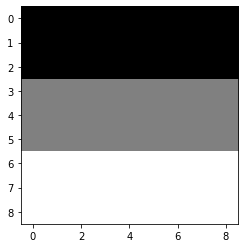

In [308]:
print(w1)
print("")
print(w2)
plt.imshow(w1, cmap='gray');

In [297]:
# загрузил изображение
img = imageio.imread('coin.png')
img = img.astype(np.float32) / 255.
img.shape

(804, 932, 3)

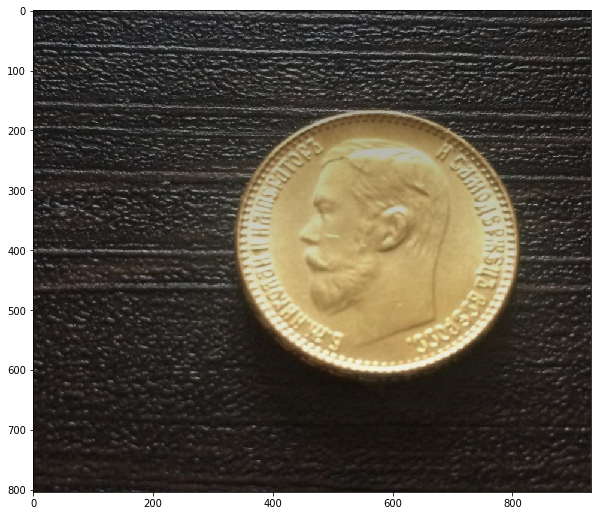

In [298]:
plt.figure(figsize=(10, 10))
plt.imshow(img);

In [300]:
# обработал изображение с целью нахождения вертикальнх и горизонтальных границ и нормализовал его
out_img_1 = []
out_img_2 = []
for c in range(3):
    out_img_1.append(scipy.signal.correlate2d(img[:,:,c], w1, mode='valid'))
    out_img_2.append(scipy.signal.correlate2d(img[:,:,c], w2, mode='valid'))
out_img_1 = np.stack(out_img_1, axis=2)
out_img_2 = np.stack(out_img_2, axis=2)
out_img = out_img_1 + out_img_2
out_img_min = abs(np.min(out_img))
out_img_max = np.max(out_img)
out_img = (out_img + out_img_min) / (out_img_min + out_img_max)

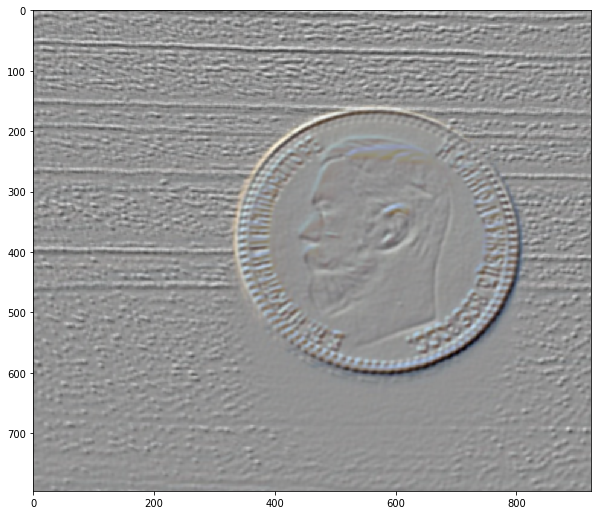

In [301]:
# границы видны, но результат не очень
plt.figure(figsize=(10, 10))
plt.imshow(out_img);

In [303]:
# вариант с нелинейным уменьшением яркости
out_img = np.copy(img**4)
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        if out_img[i, j, 0] < 0.1 and out_img[i, j, 1] < 0.1 and out_img[i, j, 2] < 0.1:
            out_img[i, j, 0] = 0
            out_img[i, j, 1] = 0
            out_img[i, j, 2] = 0

In [304]:
print(out_img[400, 600, :]) # RGB

[0.10454695 0.04585296 0.00476583]


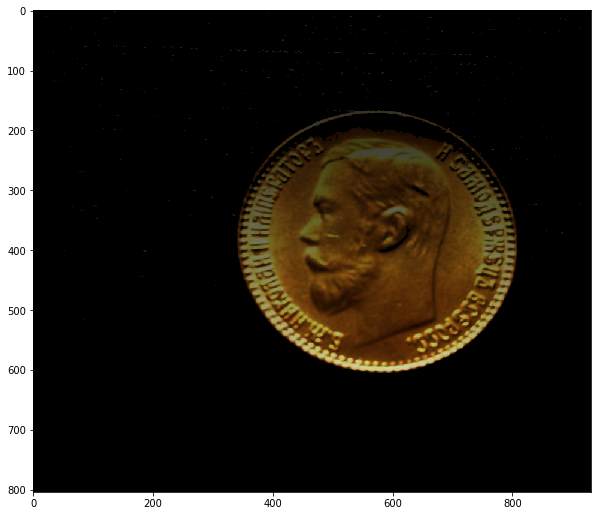

In [305]:
# визуально вариант лучше
plt.figure(figsize=(10, 10))
plt.imshow(out_img);

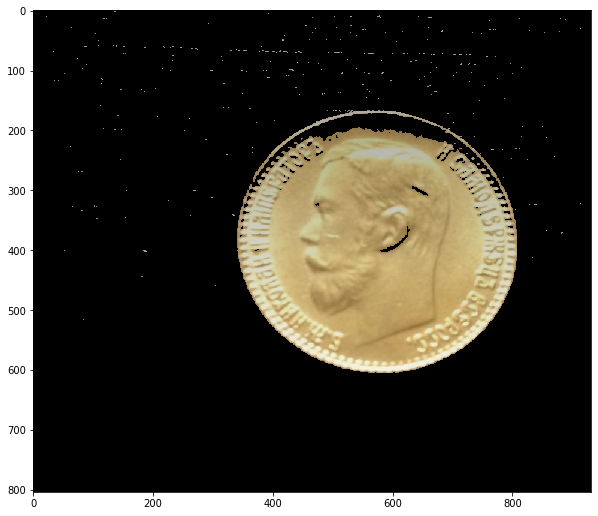

In [306]:
# при увеличении яркости видно что часть пикселей фона остались светлее порога, а часть изображения закрасилась черным
# возможно, путем подбора порогов можно добиться лучшего результата, но мне представляется что существуют более 
# продвинутые инструменты
plt.figure(figsize=(10, 10))
plt.imshow(out_img**0.25);